In [1]:
import numpy as np
import pygame
pygame.init()
pygame.font.init()
import matplotlib.pyplot

def walk(epsilon, decay, mu, iterations):
    win = pygame.display.set_mode((500,500))
    pygame.display.set_caption("Random Walk")
    clock = pygame.time.Clock()

    dimension = 5
    font = pygame.font.Font(None, 25)
    store = []

    moves = [[],[],[],[],[]]
    for i in range(5):
        for j in range(5):
            moves[i].append([])
    for i in range(5):
        for j in range(5):
            for k in range(4):
                moves[i][j].append(0)
    for i in range(5):
        for j in range(5):
            if i == 0:
                moves[i][j][1] = 1
            if i == 4:
                moves[i][j][3] = 1
            if j == 0:
                moves[i][j][0] = 1
            if j == 4:
                moves[i][j][2] = 1

    def randomQ():
        W = [[],[],[],[],[]]
        for i in range(5):
            for j in range(5):
                W[i].append([])
                for k in range(4):
                    W[i][j].append(np.random.uniform(0,1))

        for i in range(5):
            W[i][0][0] = 0
            W[0][i][1] = 0
            W[i][4][2] = 0
            W[4][i][3] = 0
        return W

    class tile(object):
        def __init__(self, x, y, colour):
            self.x = x
            self.y = y
            self.colour = colour

        def draw(self, win):
            pygame.draw.rect(win, self.colour, (self.x, self.y, 50, 50))

    def redrawwindow(t):
        win.fill((0,0,0))
        for i in range(1 + dimension**2):
            box[i].draw(win)
        if t == 1:
            dot.draw(win)
        else:
            dot.draw1(win)
        move = str(moves)
        compl = str(completed)
        text1 = 'MOVES: ' + move
        text2 = 'COMPLETED: ' + compl
        t1 = font.render(text1, True, (255, 255, 255))
        t2 = font.render(text2, True, (255, 255, 255))
        win.blit(t1, (100, 30))
        win.blit(t2, (100, 60))

    class player(object):
        def __init__(self, i, j, W, epsilon, moves, store):
            self.i = i
            self.j = j
            self.W = W
            self.epsilon = epsilon
            self.moves = moves
            self.store = store

        def draw(self, win):
            pygame.draw.circle(win, (0, 0, 255), (self.i*60 + 125, self.j*60 + 125), 10)
            self.move()

        def draw1(self, win):
            pygame.draw.circle(win, (0, 0, 255), (self.i*60 + 125, self.j*60 + 125), 10)

        def move(self):
            u = np.random.uniform(0,1)
            if u >= self.epsilon:
                p = self.W[self.i][self.j]
                q = max(p)
                L = [i for i,j in enumerate(p) if j == q]
                r = np.random.randint(len(L))
                m = L[r]
            else:
                M = self.moves[self.i][self.j]
                f = [p for p,q in enumerate(M) if q != 1]
                r = np.random.randint(len(f))
                m = f[r]
            self.store.append([self.i, self.j, m])

            if m == 0 :
                self.j += -1
            if m == 1:
                self.i += -1
            if m == 2:
                self.j += 1
            if m == 3:
                self.i += 1

        def checkwin(self):
            if self.i == 3 and self.j == 2:
                return 1
            else:
                return 0


    W = randomQ()
    position = [0, 2]
    dot = player(0, 2, W, epsilon, moves, store)
    box = []
    moves = 0
    completed = 0
    for i in range(dimension):
        for j in range(dimension):
            box.append(tile(60*i + 100, 60*j + 100, (255, 255, 255)))
    box.append(tile(180 + 100, 120 + 100, (0, 255, 0)))
    k = 0
    result = []

    run = True
    while run:
        clock.tick(60)
        
        if completed >= iterations:
            run = False

        if dot.checkwin() == 1:
            k = 1

        redrawwindow(1)
        pygame.display.update() 

        if k == 1:
            result.append([completed, moves])
            dot.i = 3
            dot.j = 2
            redrawwindow(0)
            pygame.display.update()
            clock.tick(60)
            moves = -1
            completed += 1
            dot.i = 0
            dot.j = 2

            for l in range(len(dot.store)):
                p = dot.store[len(dot.store) - 1 - l]
                dot.W[p[0]][p[1]][p[2]] += mu**l
            dot.epsilon = dot.epsilon * decay

            k = 0
        
        moves += 1

        for event in pygame.event.get():
                if event == pygame.quit:
                    pygame.quit()
                    run = False

    pygame.quit()
    X = []
    Y = []
    for i in range(len(result)):
        X.append(result[i][1])
        Y.append(result[i][0])
    matplotlib.pyplot.scatter(Y, X)
    
    return [W, result]

[[[[0, 0, 0.62426953867408, 1.0710183953760388],
   [0.49484781605951206, 0, 1.5274623272455423, 4.613592073885286],
   [3.678022416633475, 0, 2.7773779879062355, 83.96059919908663],
   [1.6402718672689753, 0, 3.6633056099384547, 1.9571092501334575],
   [1.1227842762758948, 0, 0, 5.243800766733932]],
  [[0, 0.5459577251195281, 1.8499044608515607, 0.5962281764834577],
   [1.5610657470374438,
    1.3120697783344706,
    9.302372348504184,
    3.6467685116137445],
   [2.7506291748679432,
    4.633938676189182,
    5.714161804596334,
    128.9634544618738],
   [2.070854978194183,
    0.6786049191911872,
    1.4315596044597516,
    19.43048494313414],
   [8.25567369850207, 1.895446127672231, 0, 1.097678385275633]],
  [[0, 0.20571287806304117, 2.547245126134384, 1.215332241121411],
   [1.5853941602259254,
    1.4749376869641548,
    4.20373825098502,
    14.555617187204824],
   [6.690313461939713,
    4.9286917120046745,
    6.7076273196610146,
    180.11215968979306],
   [5.065315021535681,

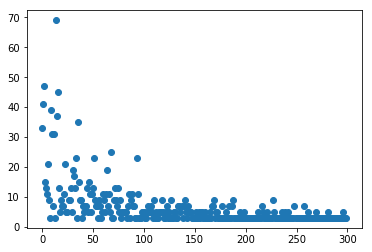

In [2]:
walk(0.9, 99/100, 0.7, 300)